lab_1_6409_010302D_ЧернышоваДК.ipynb.

In [ ]:
!pip install nltk inflect 

In [14]:
import re
import inflect
import nltk

from nltk.util import ngrams
from collections import Counter

from nltk.probability import FreqDist
import matplotlib.pyplot as plt


nltk.download('gutenberg', quiet=True)
nltk.download('punkt', quiet=True)

books = [] # books titles
raw_texts = [] # books contents

for fileid in nltk.corpus.gutenberg.fileids():
    books.append(fileid)
    raw_texts.append(nltk.corpus.gutenberg.raw(fileid))

#### Шаг №1
Предобработайте тексты, которые содержатся в списке `raw_texts`, но сначала внимательно изучите их структуру. Сохраните полученные данные в списке `books_tokens` (в разрезе книг, как и было с сырыми текстами).

Порядок обработки текста:
* Замените все числа, которые представлены цифрами, их текстовым представлением (т.е. прописью). Пример: 1 = one, 23 = twenty three, 1042 = one thousand forty two, и т.п. См. библиотеку **inflect**.
* Приведите текст к нижнему регистру
* Произведите токинезацию, в качестве токенов выступают слова.


In [4]:
infl = inflect.engine()
# TODO remove slicing when done with testing
# replace all digits with its text representation
for text in raw_texts[0:2]:
    for number in re.findall('(\d+)', text):
        text = text.replace(number, infl.number_to_words(int(number)))

In [8]:
books_tokens = list(raw_text.lower().split() for raw_text in raw_texts[0:1])

translation_table = str.maketrans('', '', ''.join(['[', ']', '.', ',', '_', '?', ';', '!']))

# replace all punctuation marks
for book_tokens in books_tokens:
    for i, token in enumerate(book_tokens):
        book_tokens[i] = token.translate(translation_table)

print(books_tokens[0][0:30])

['emma', 'by', 'jane', 'austen', '1816', 'volume', 'i', 'chapter', 'i', 'emma', 'woodhouse', 'handsome', 'clever', 'and', 'rich', 'with', 'a', 'comfortable', 'home', 'and', 'happy', 'disposition', 'seemed', 'to', 'unite', 'some', 'of', 'the', 'best', 'blessings']


#### Шаг №2

* Вычислите словари для каждой книги (переменная `books_vocabularies`).
* Вычислите словарь для всего корпуса (переменная `books_vocabulary`).
* Рассчитайте частоту употребления токенов в корпусе (переменная `freq_tokens`), и постройте график зависимости частоты употребления токена от токена (для 30-ти самых популярных).

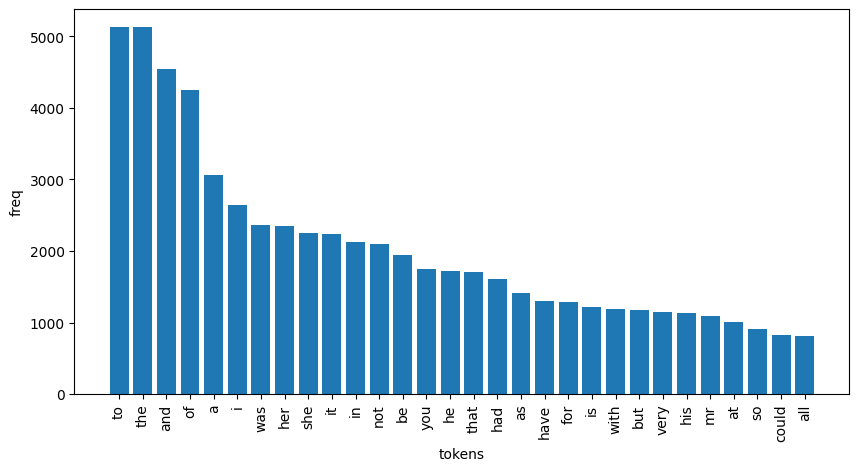

In [23]:
books_vocabularies = list(set(book_tks) for book_tks in books_tokens) # list of sets of tokens for each book
books_vocabulary = list(set.union(*books_vocabularies)) # list of all tokens

tokens = books_tokens[0]
fdist = FreqDist(tokens)
most_common_tokens = fdist.most_common(30)
plt.figure(figsize=(10, 5))
plt.bar(*zip(*most_common_tokens))
plt.xlabel('tokens')
plt.ylabel('freq')
plt.xticks(rotation=90)  # Rotate x-labels for better visibility
plt.show()

#### Шаг №3
* Сгенерируйте список триграмм (переменная `trigrams`) по всему корпусу и рассчитайте частоту их употребления (переменная `freq_trigrams`).
* Реализуйте наивный генератор текста (30 токенов). 
    1. Для затравки берется два стартовых токена, которые становятся текущими. Первый токен выводится на экран.
    2. Второй токен из активной пары токенов выводится на экран. Если мы сгененрировали нужное количество текста, то останавливаем алгоритм.
    3. По текущей паре токенов (первые в триграмме) определяется наиболее употребительная траграмма, которая помечается как использованная. Использованные триграммы на последующих шагах в рассмотрении не участвуют. Второй и третий токены данной триграммы становятся текущими. Переходим к п. 2.

In [ ]:
trigrams = list(ngrams(books_tokens[0], 3))

# sorted by frequency
freq_trigrams = dict(sorted(Counter(trigrams).items(), key=lambda item: item[1], reverse=True))

# testing
first_ten = dict(list(freq_trigrams.items())[:10])
print(first_ten)

In [ ]:
res = []

active_token = list(freq_trigrams.items())[0]
print(active_token)

res.extend(active_token[0][:2])

while len(res) < 30:
    for e in freq_trigrams.items():
        if e[0][0] == active_token[0][1] and e[0][1] == active_token[0][2]:
            active_token = e
            print(active_token)
            break
    res.append(active_token[0][2])

print(' '.join(res))